# Correlation

Relationship between an independent and dependent variable.

Types of correlation
1. Positive: The dependent and independent variable are changing in the same direction (if one increases another increases too and vice versa) 
2. Negative: The dependent and independent variable are changing in the oppostive direction (if one increases another decreases and vice versa) 
3. Zero: The dependent variable is unaffected by the change in independent variable

Checking correlation between two variables 

In [5]:
# import necessary libararies 
import seaborn as sb 
df = sb.load_dataset('tips') 
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# Checking correlation between tip and total bill 
df[['tip', 'total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<b>Interpretation:</b> The correlation of 0.67 shows that there is positive significant relationship between tip and total_bill indicating the significant increase in total bill as the increase in tip occurs.

# Main Approaches(Methods) for calculating correlation 

1. Pearson's correlation coefficient
2. Spearman's rank correlation coefficient

# Pearson's correlation coefficient

Pearson's correlation coefficient is a measure of the linear correlation between two variables X and Y. It has a value between +1 and -1 where 1 is total positive linear correlation, 0 is no linear correlation, and -1 is total negative correlation. It is applied assuming that the dataset is normally distributed. It is a parametric test.

# Example of Pearson's correlation coefficient from formula without using library

In [1]:
# pearson's correlation coefficient
import numpy as np
import pandas as pd

def pearson(x,y):
    x = np.array(x)
    y = np.array(y)
    if len(x) != len(y):
        raise ValueError("The length of x and y must be the same.")
    x_mean = np.mean(x) 
    y_mean = np.mean(y) 
    x_std = np.std(x)
    y_std = np.std(y)
    n = len(x) 
    return sum((x - x_mean) * (y - y_mean)) / (n * x_std * y_std)

In [2]:
# example dataset 
x = np.array([1,2,3,4,5]) 
y = np.array([2,3,7,8,6]) 
# calculating pearson's correlation coefficient 
pearson_coefficient = pearson(x, y) 
print(f"Pearson's correlation coefficient: {pearson_coefficient}") 

Pearson's correlation coefficient: 0.794101388315984


<b>Interpretations:</b><br>1. Pearson's correlation coefficient is 0.79 which shows the positive correlation between x and y variable.<br>2.The dependent and independent variables are not well defined.

# Spearman's rank correlation coefficient

It is same as Pearson's correlation coefficient but the only difference is that it takes rank into consideration. It is a non-parametric test which assumes that the data is not normally distributed

In [3]:
# Spearman's rank correlation coefficient 
def spearman(x,y):
    x = np.array(x)
    y = np.array(y)
    if len(x) != len(y):
        raise ValueError("The length of x and y must be the same.")
    x_rank = pd.Series(x).rank()
    y_rank = pd.Series(y).rank()
    return pearson(x_rank, y_rank)

# calculating spearman's rank correlation coefficient 
spearman_coefficient = spearman(x, y) 
print(f"Spearman's rank correlation coefficient: {spearman_coefficient}") 

Spearman's rank correlation coefficient: 0.6999999999999998


<b>Interpretations:</b><br> 1. Spearman's correlation coefficent is almost 0.70 which shows positive correlation between x and y variable.<br>2. It is less than the result of pearson's correlation coefficient indicating slightly less positive correlation between x and y variable. 

Visualization of correlation using seaborn's lmplot

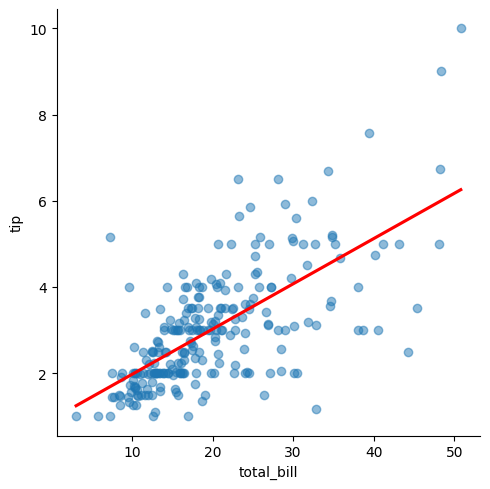

In [6]:
# Visualizing correlation using seaborn's lmplot 
sb.lmplot(x='total_bill', y='tip', data=df, ci=None, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

Interpretation: The central line moving up from the left indicates positive correlation between tips and total_bill 

We can also apply pairplot to gain insights about the correlations in all of the variables in the data.

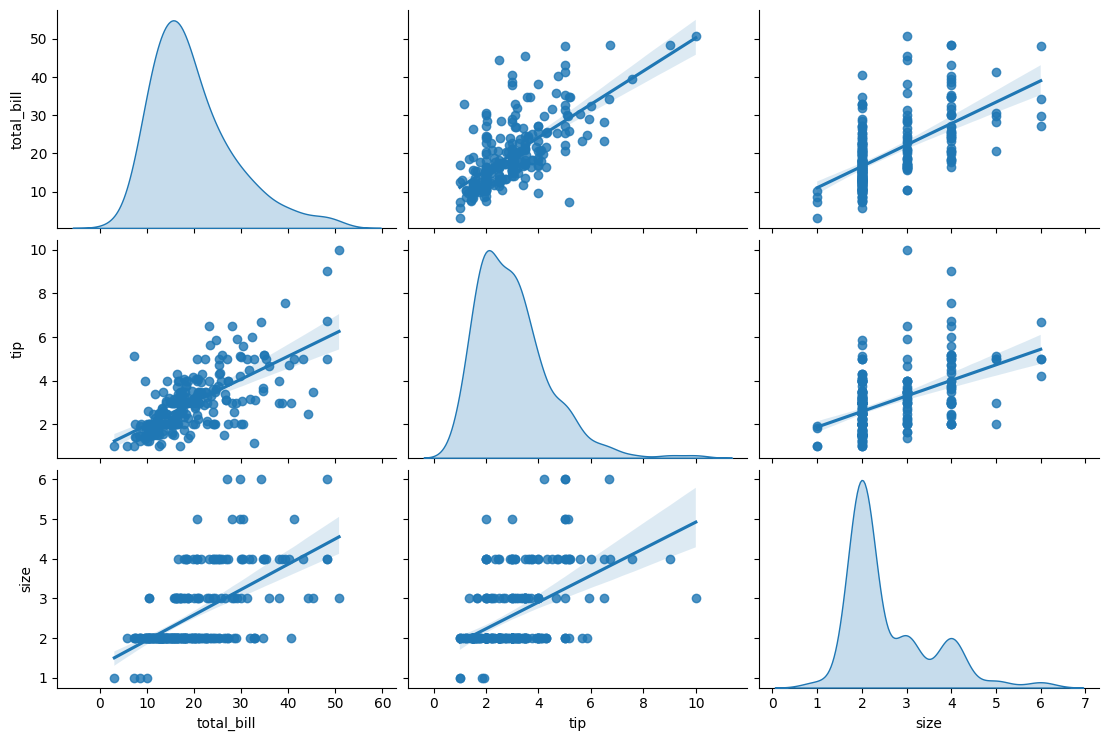

In [11]:
sb.pairplot(df, kind='reg', diag_kind='kde', markers='o', height=2.5, aspect=1.5)

Visualizing all types of correlation(positive,neutral and negative) using numpy and matplotlib

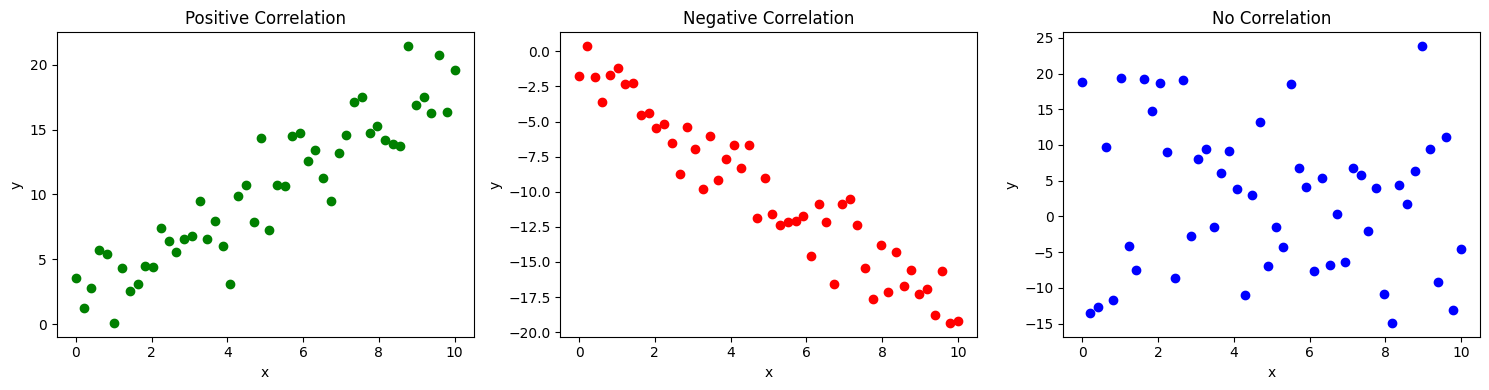

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generating example data
np.random.seed(0)
x = np.linspace(0, 10, 50)

# Positive correlation
y_pos = 2 * x + np.random.normal(0, 2, size=x.size)

# Negative correlation
y_neg = -2 * x + np.random.normal(0, 2, size=x.size)

# Neutral correlation
y_neu = np.random.normal(0, 10, size=x.size)

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Positive
axs[0].scatter(x, y_pos, color='green')
axs[0].set_title('Positive Correlation')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Negative
axs[1].scatter(x, y_neg, color='red')
axs[1].set_title('Negative Correlation')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# Neutral
axs[2].scatter(x, y_neu, color='blue')
axs[2].set_title('No Correlation')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
# Showing the plots
plt.tight_layout()